<a href="https://colab.research.google.com/github/rangasalapavani/DataScience-Projects/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PASSENGER SURVIVAL PREDICTION**

**Objective**

This project aims to predict the survival of passengers aboard the Titanic using machine learning techniques. The classic Titanic dataset from Kaggle is used, which includes details like age, gender, passenger class, fare, and more. The objective is to build a classification model that can effectively determine whether a passenger survived based on these features.

As a data analyst, I performed detailed data preprocessing, exploratory data analysis (EDA), and applied various machine learning models to evaluate performance and interpret feature importance.

**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Loading the dataset**

In [ ]:
titanic=pd.read_csv('/content/Titanic-Dataset.csv')

**Checking  first 5 rows**

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Checking the number of rows and columns**

In [ ]:
titanic.shape

(891, 12)

**Checking the datatypes of features**

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 5 categorical columns AND the rest are Numeric .


1.   Categorical Columns:Name,Sex,Ticket,Cabin,Embarked
2.   Continuous Columns:PassengerId,Survived,Pclass,Age,Sibsp,Parch,Fare

**Checking the summary of numerical columns**

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Checking for null values**

In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


There are maximum null values in Cabin column,followed by Age and Embarked columns.
Let us visualize  the null values using heatmap.

**Heatmap(Checking for correlation)**

<Axes: >

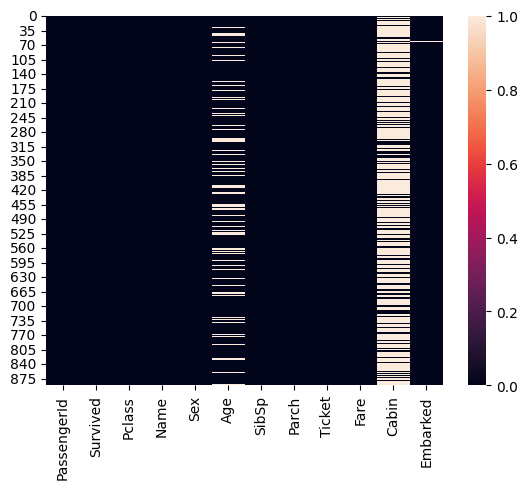

In [ ]:
sns.heatmap(titanic.isnull())

On seeing the heatmap we can find that there are more null values in Cabin column and we need to drop it . As for Age we need to find a way to fill the null values if necessary and in case of Embarked there are only 2 values so they can also be replaced if necessary .

**count the columns**

In [ ]:
titanic['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


In [ ]:
titanic['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [ ]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

<ipython-input-12-d4dc62d1860c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


<Axes: >

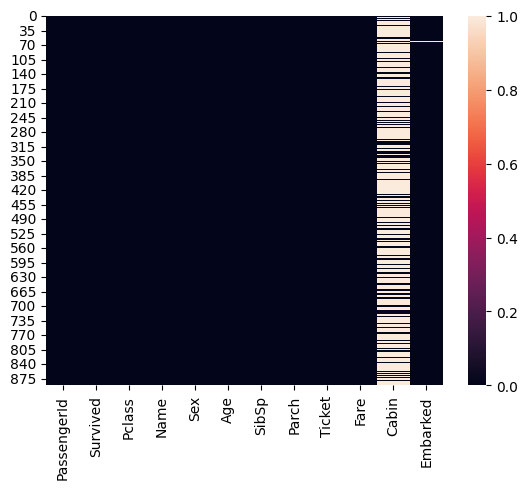

In [ ]:
sns.heatmap(titanic.isnull())

**Drop the cloumn**

In [ ]:
titanic.drop('Cabin',axis=1,inplace=True)

In [ ]:
titanic['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

<ipython-input-16-851f276fc476>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


<Axes: >

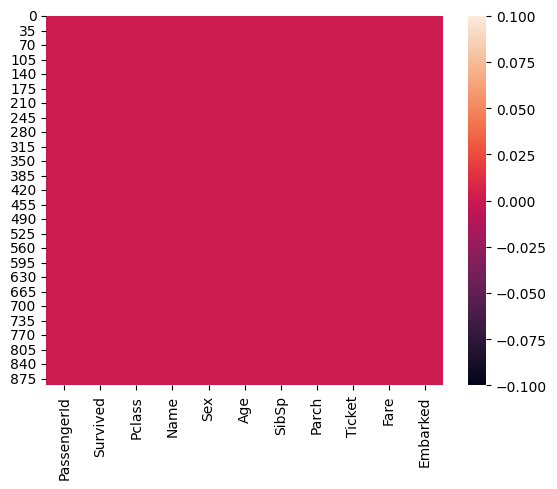

In [ ]:
sns.heatmap(titanic.isnull())

In [ ]:
titanic['Survived'].value_counts()

,count
Survived,
0,549
1,342


Out of 891 passengers,only 342 have survived and the remaining 549 have died.
Now let us see the proportion of passengers survived with the help of pie chart.

**Exploratory Data Analysis for Categorical Columns and continuous columns**

**Survived**

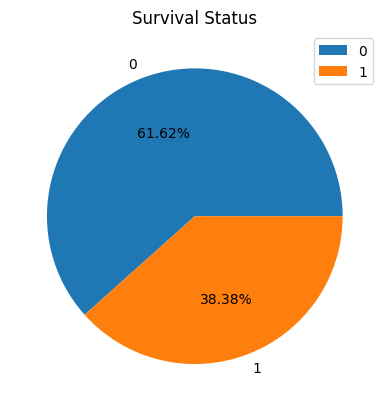

In [ ]:
plt.pie(titanic['Survived'].value_counts(),labels=titanic['Survived'].value_counts().index,autopct='%2.2f%%')
plt.title('Survival Status')
plt.legend(titanic['Survived'].value_counts().index)

Only 38% of passengers have survived.

**Age**

<Axes: xlabel='Age', ylabel='Count'>

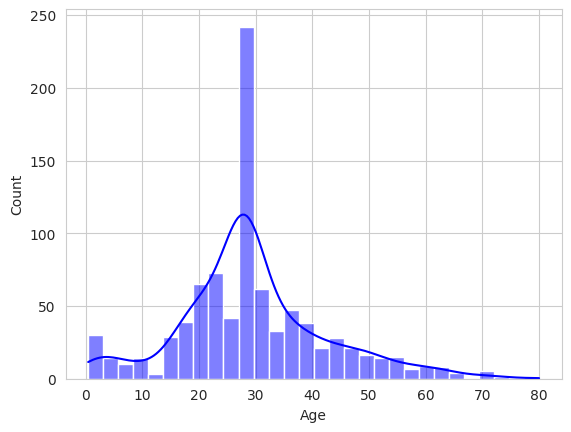

In [ ]:
sns.histplot(titanic['Age'], bins=30, kde=True, color='blue')

By the above histogram we can say that most of the passengers are aged between 20-40 years.
But we have null values in 'Age' column . So we have to fill them. Here we can fill the age with median/mean.
Here mean age is 29.699 years, we can fill with 29 years.

**PClass**

Text(0.5, 1.0, 'Distribution of Passengers based on Class')

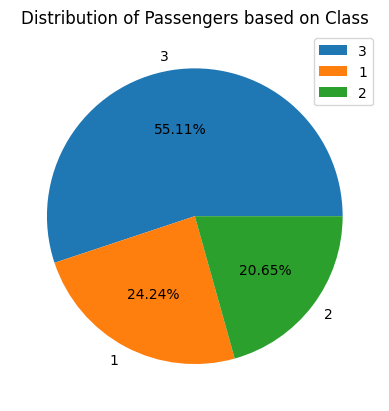

In [ ]:
plt.pie(titanic['Pclass'].value_counts(),labels=titanic['Pclass'].value_counts().index,autopct='%2.2f%%')
plt.legend(titanic['Pclass'].value_counts().index)
plt.title('Distribution of Passengers based on Class')

From the above pie chart we can observe that , majority of passengers belong to class 3 , followed by class 2 .

**SibSP**

<ipython-input-30-f0c5886ee0ae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic['SibSp'], palette="muted")


<Axes: xlabel='SibSp', ylabel='count'>

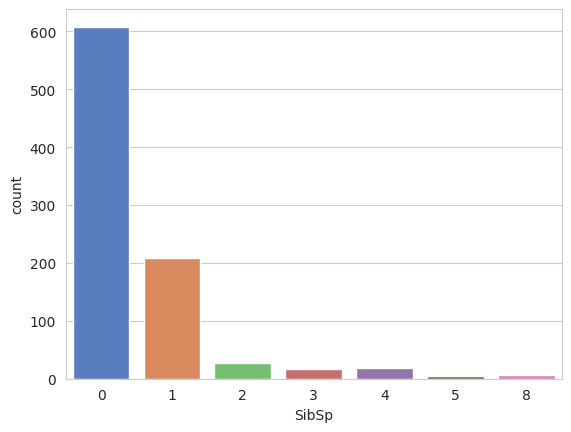

In [ ]:
sns.countplot(x=titanic['SibSp'], palette="muted")

**Embarked**

<Axes: ylabel='count'>

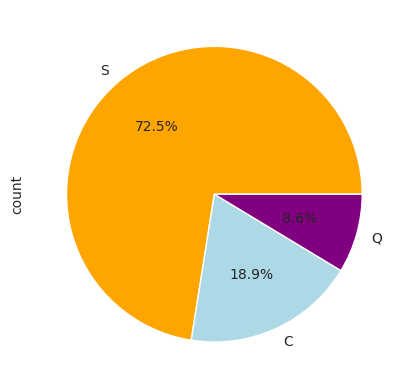

In [ ]:
titanic['Embarked'].value_counts().plot.pie(autopct='%1.1f%%', colors=['orange', 'lightblue', 'purple'])

**Fare**

<Axes: xlabel='Fare', ylabel='Count'>

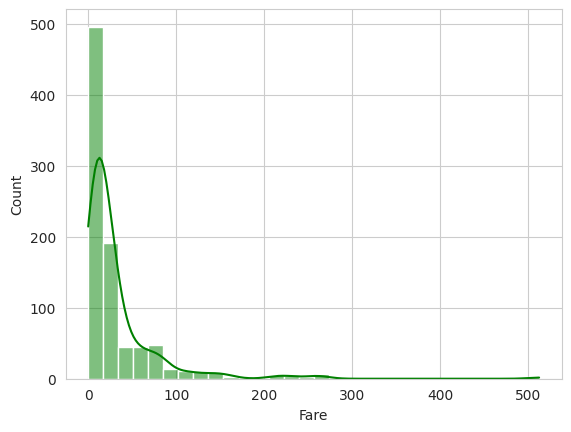

In [ ]:
sns.histplot(titanic['Fare'], bins=30, kde=True, color='green')

**parch**

Text(0.5, 0, 'Count of Parent/Child')

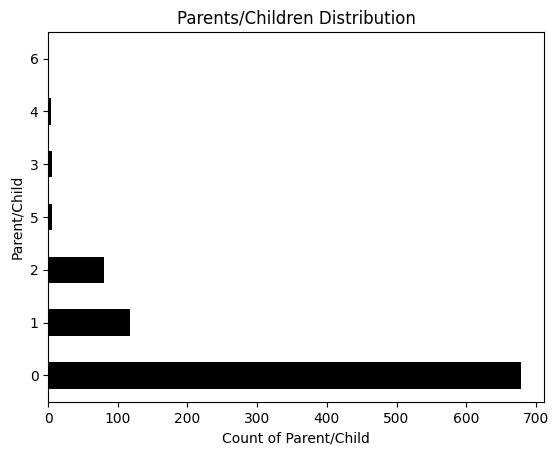

In [ ]:
titanic['Parch'].value_counts().plot(kind='barh',color='black')
plt.title('Parents/Children Distribution')
plt.ylabel('Parent/Child')
plt.xlabel('Count of Parent/Child')

**Sex**

Text(0.5, 1.0, 'Gender Distribution')

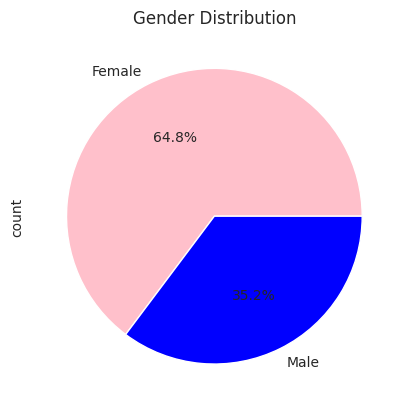

In [ ]:
titanic['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['pink', 'blue'], labels=['Female', 'Male'])
plt.title("Gender Distribution")

Out of the passengers who travelled , almost 65% of them are males.

  **Target vs other columns**

<Axes: xlabel='Survived', ylabel='count'>

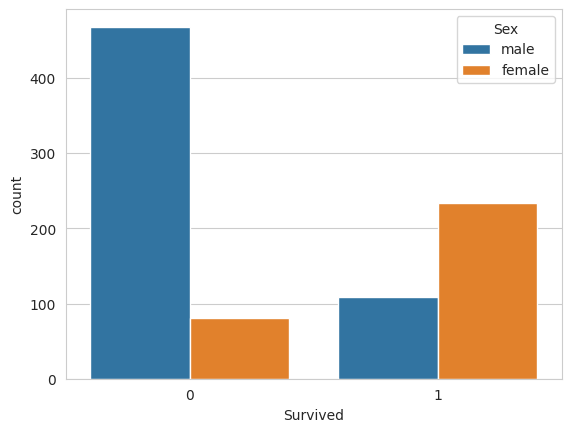

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic)

Among the passengers who survived,most of them are female.

Text(0.5, 1.0, 'Survival Status of Passengers based on the Class ')

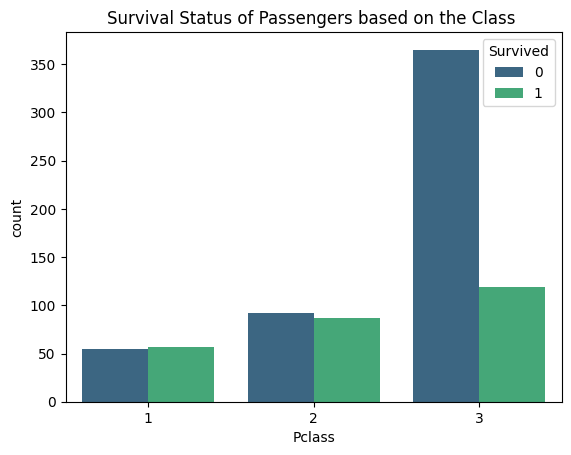

In [ ]:
sns.countplot(data=titanic,hue='Survived',x='Pclass',palette='viridis')
plt.title('Survival Status of Passengers based on the Class ')

Passengers who travelled in Pclass 3 have survived the least when compared to the total who are in Class 3(but the number is big among all three classes),and the passengers who travelled in class2 have more survivals when compared to all.

Coming to class 1 , the passengers who survived is almost equal to those who died.

Text(0.5, 1.0, 'Fare Distribution')

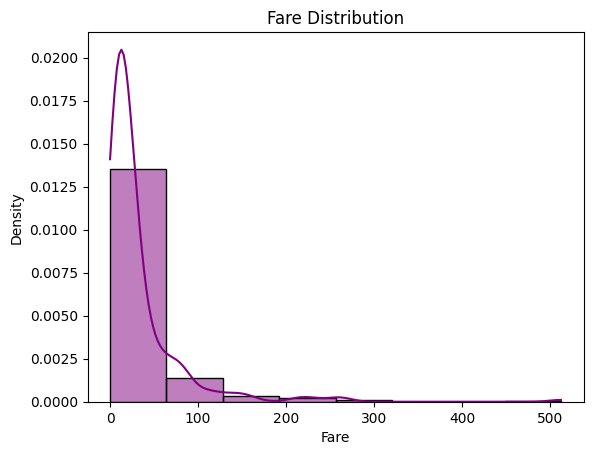

In [ ]:
sns.histplot(titanic['Fare'], bins=8, stat="density", kde=True, color='purple')
plt.title('Fare Distribution')

The fare price is mostly concentrated between 0 and 100 as seen in the histplot.

Text(0.5, 1.0, 'Survival Status of Passengers based on Siblings/Spouses')

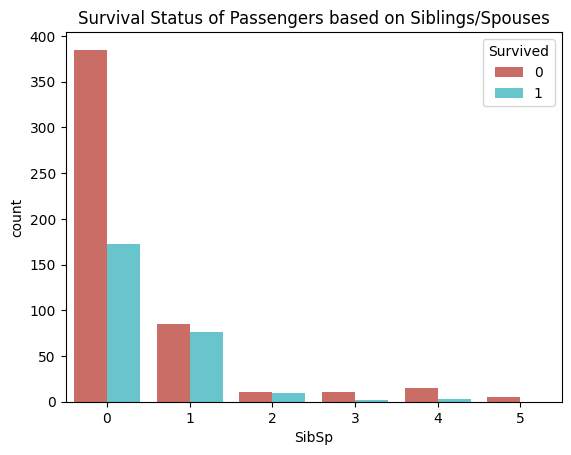

In [ ]:
sns.countplot(data=titanic,x='SibSp',hue='Survived',palette='hls')
plt.title('Survival Status of Passengers based on Siblings/Spouses')

Now we can see that the passengers who traveeld without their sibings and spouses have survied.

Text(0.5, 1.0, 'Survival Status of Passengers based on Parents/Children')

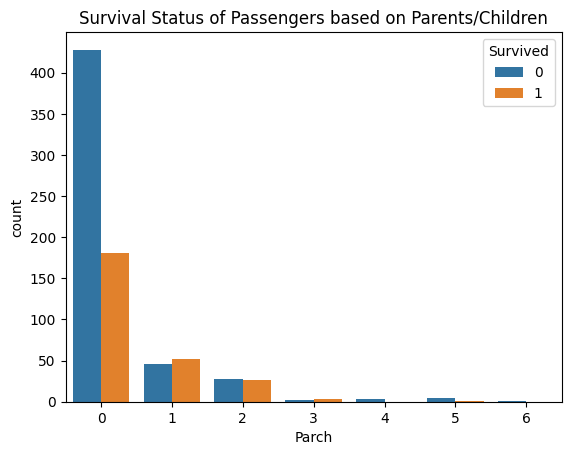

In [ ]:
sns.countplot(data=titanic,x='Parch',hue='Survived')
plt.title('Survival Status of Passengers based on Parents/Children')

Here we can see that survival rate is high among passengers who travelled with no parents and cildren.

<Axes: xlabel='Embarked', ylabel='count'>

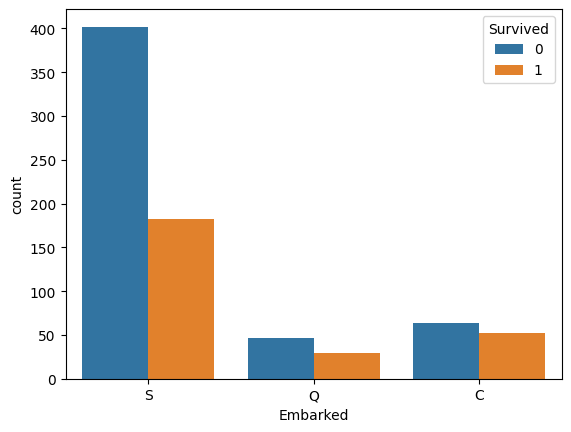

In [ ]:
sns.countplot(data=titanic,x='Embarked',hue='Survived')

Cherbourg (C), Queenstown (Q), and Southampton (S)

From the above graph we can see that the Survival rate is high among passengers Embarked from Southampton port and low from Queenstown port.

<Axes: xlabel='Age', ylabel='Fare'>

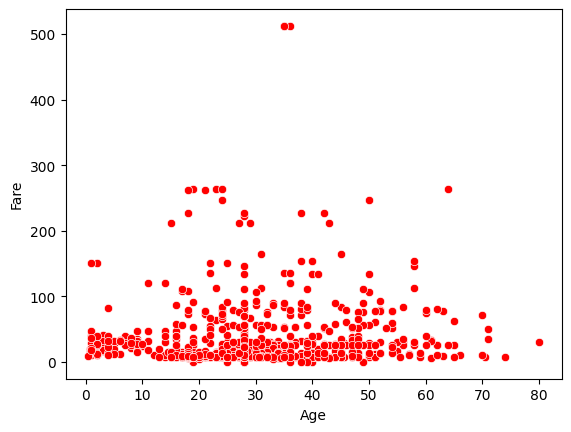

In [ ]:
sns.scatterplot(data=titanic,x='Age',y='Fare',color='red')

On seeing the Age-Fare relation we can see some outliers , i.e. here the Fare charges for the age = 40 is 500 which seems to be uneven.So we need to remove or replace them.

<Axes: xlabel='Age', ylabel='Fare'>

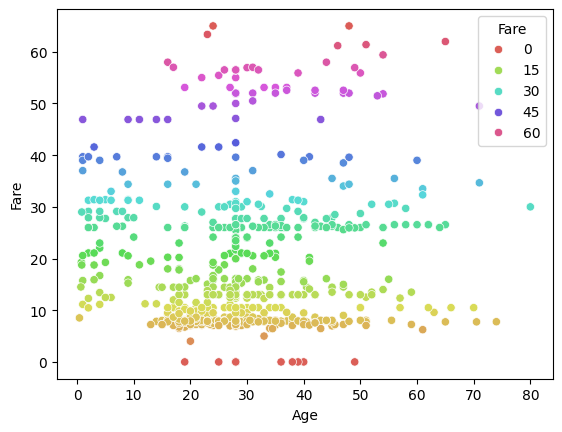

In [ ]:
sns.scatterplot(data=titanic,x='Age',y='Fare',hue='Fare',palette='hls')

Now their are no outliers in the data.

**FILLING MISSING VALUES AND DROPPING UNECESSARY COLUMNS**

The columns 'Name','Ticket'are not necessary so we can drop them. As discussed earlier we can also drop 'cabin' column as 80% of the values are missing.

In [ ]:
titanic.drop(columns=['Name', 'PassengerId', 'Ticket'], inplace=True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic.shape

(891, 8)

In [ ]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# **REMOVING OUTLIERS**

In [ ]:
def remove_outliers(titanic,Fare):
  Q1 = titanic['Fare'].quantile(0.25)
  Q3 = titanic['Fare'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return titanic[(titanic['Fare']>=lower_bound)&(titanic['Fare']<=upper_bound)]

In [ ]:
cols = ['Fare']
for i in cols:
  titanic = remove_outliers(titanic,cols)

**ENCODING CATEGORICAL FEATURES**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1


**FEATURE SCALING**

We need to scale the columns like age and face as there might chances that these columns will bw give main priority.

In [ ]:
from sklearn.preprocessing import StandardScaler
cols=['Age','Fare']
scaler = StandardScaler()
titanic[cols] = scaler.fit_transform(titanic[cols])

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.528321,1,0,-0.779117,2
2,1,3,0,-0.215182,0,0,-0.729373,2
3,1,1,0,0.489381,1,0,2.599828,2
4,0,3,1,0.489381,0,0,-0.720161,2
5,0,3,1,-0.058613,0,0,-0.690071,1


In [ ]:
total_passenger=titanic['Parch']+titanic['SibSp']+1
total_passenger.head()

,0
0,2
2,1
3,2
4,1
5,1


**TRAIN_TEST_SPLIT**

In [ ]:
y=titanic['Survived']
x=titanic.drop(columns='Survived')
print(y)

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 775, dtype: int64


In [ ]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1 -0.528321      1      0 -0.779117         2
2         3    0 -0.215182      0      0 -0.729373         2
3         1    0  0.489381      1      0  2.599828         2
4         3    1  0.489381      0      0 -0.720161         2
5         3    1 -0.058613      0      0 -0.690071         1
..      ...  ...       ...    ...    ...       ...       ...
886       2    1 -0.136897      0      0 -0.355367         2
887       1    0 -0.763176      0      0  0.897459         2
888       3    0 -0.058613      1      2  0.414752         2
889       1    1 -0.215182      0      0  0.897459         0
890       3    1  0.254527      0      0 -0.742269         1

[775 rows x 7 columns]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(620, 7)
(620,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(155, 7)
(155,)


# **MODEL FITTING**

**KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)

print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.8274193548387097
0.7548387096774194


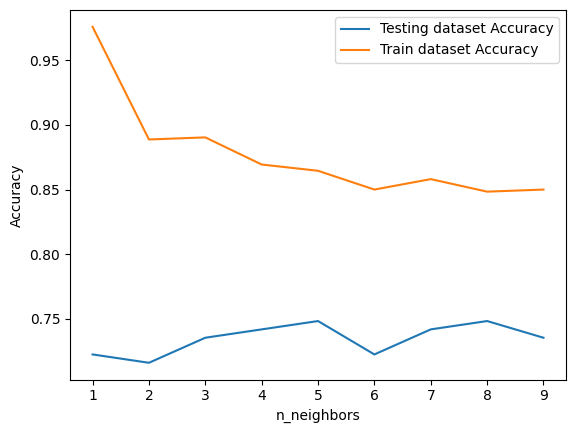

In [ ]:
neighbors=np.arange(1,10)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)

  train_accuracy[i]=knn.score(x_train,y_train)
  test_accuracy[i]=knn.score(x_test,y_test)
plt.plot(neighbors,test_accuracy,label='Testing dataset Accuracy')
plt.plot(neighbors,train_accuracy,label='Train dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=knn.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7354838709677419


**Model Prediction Using LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

Lg=LogisticRegression()
Lg.fit(x_train,y_train)

y_predict=Lg.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_test,y_predict)
print(f"Accuracy:{accuracy}")
print(classification_report(y_test,y_predict))

Accuracy:0.7419354838709677
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        92
           1       0.72      0.60      0.66        63

    accuracy                           0.74       155
   macro avg       0.74      0.72      0.72       155
weighted avg       0.74      0.74      0.74       155



**Model prediction using NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train)

# Predict Output
predicted = model.predict(x_test)

print("Actual Value:", y_test)
#print("Predicted Value:", predicted)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Actual Value: 368    1
460    1
328    1
160    0
150    0
      ..
156    1
824    0
433    0
327    1
876    0
Name: Survived, Length: 155, dtype: int64
Accuracy: 0.7354838709677419


**Model prediction using DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7483870967741936


**Model Prediction Using XGBoostclassifier**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7741935483870968
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        92
           1       0.76      0.65      0.70        63

    accuracy                           0.77       155
   macro avg       0.77      0.75      0.76       155
weighted avg       0.77      0.77      0.77       155



**Data overview Dataset**: PASSENGER SURVIVAL PREDICTION

The dataset used in this project is the classic Titanic dataset, which contains information about passengers aboard the RMS Titanic. The goal is to predict whether a passenger survived or not based on features like age, class, sex, and family relationships.

 **Dataset Structure**

Total Rows: 891

Total Columns: 12 (before cleaning)

**1:Data Preprocessing**

-> Handling Missing Values:

Age: Filled with median

Embarked: Filled with mode

Cabin: Dropped due to too many missing values

-> Feature Selection & Cleaning:

Removed unnecessary columns: PassengerId, Name, Ticket, Cabin

Categorical features (Sex, Embarked, Pclass) were label-encoded or one-hot encoded

-> Data Splitting:

Dataset split into training and test sets using train_test_split()

**2:Exploratory Data Analysis (EDA)**

-> Univariate Analysis:

Plotted distributions of Age, Fare, Pclass, Sex, and Embarked

Found most passengers were young males in 3rd class

-> Bivariate Analysis:

Survival rate was much higher for females and 1st class passengers

Fare and family size (SibSp, Parch) slightly influenced survival

-> Key Charts Used:

Count plots

Pie charts

Histograms

Heatmap of missing values

**3:Modeling & Evaluation**

Several classification models were tested to predict survival:

Model	Performance

* Logistic Regression	78–82%	Simple, fast, interpretable
* Random Forest	80–85%	Handles non-linearity well
* XGBoost	82–88%	Best performance with tuning
* KNN/SVM	75–80%	Dependent on feature scaling

**Best Modeling**

XGBoost Classifier — gave the highest accuracy and generalization when hyperparameters were tuned.

**Conclusion**

* Logistic Regression offered strong baseline performance.

* XGBoost delivered the best results in terms of predictive power and generalization.

This project demonstrates how domain knowledge, proper preprocessing, and model selection can significantly improve the performance of a classification task.